In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path = "C:/Users/w1832138/Documents/daily_dataset"  
all_files = [os.path.join(path, f"block_{num}.csv") for num in range(0, 112)]
df_list = [pd.read_csv(file)[['day', 'LCLid', 'energy_sum']] for file in all_files]
energy = pd.concat(df_list, ignore_index=True)

In [3]:
#path1 = "C:/Users/w1832138/Documents/weather_daily_darksky"
#df_list1 = [pd.read_csv(file)[['temperatureMax']]]
#energy = pd.concat(df_list1, ignore_index=True)

In [4]:
print(energy.head())

          day      LCLid  energy_sum
0  2012-10-12  MAC000002       7.098
1  2012-10-13  MAC000002      11.087
2  2012-10-14  MAC000002      13.223
3  2012-10-15  MAC000002      10.257
4  2012-10-16  MAC000002       9.769


In [5]:
print(energy.shape)

(3510433, 3)


In [6]:
print(energy.describe())

         energy_sum
count  3.510403e+06
mean   1.012414e+01
std    9.128793e+00
min    0.000000e+00
25%    4.682000e+00
50%    7.815000e+00
75%    1.256900e+01
max    3.325560e+02


In [7]:
print(energy.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   day         object 
 1   LCLid       object 
 2   energy_sum  float64
dtypes: float64(1), object(2)
memory usage: 80.3+ MB
None


In [8]:
energy.dropna(inplace=True)
print(energy.isnull().sum())  # Better for checking each column for nulls

day           0
LCLid         0
energy_sum    0
dtype: int64


<Axes: >

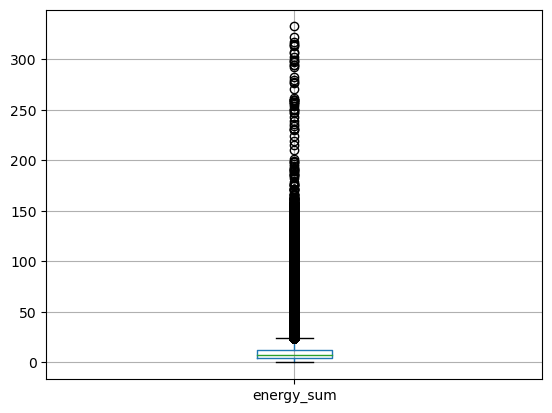

In [9]:
energy.boxplot(column=["energy_sum"])

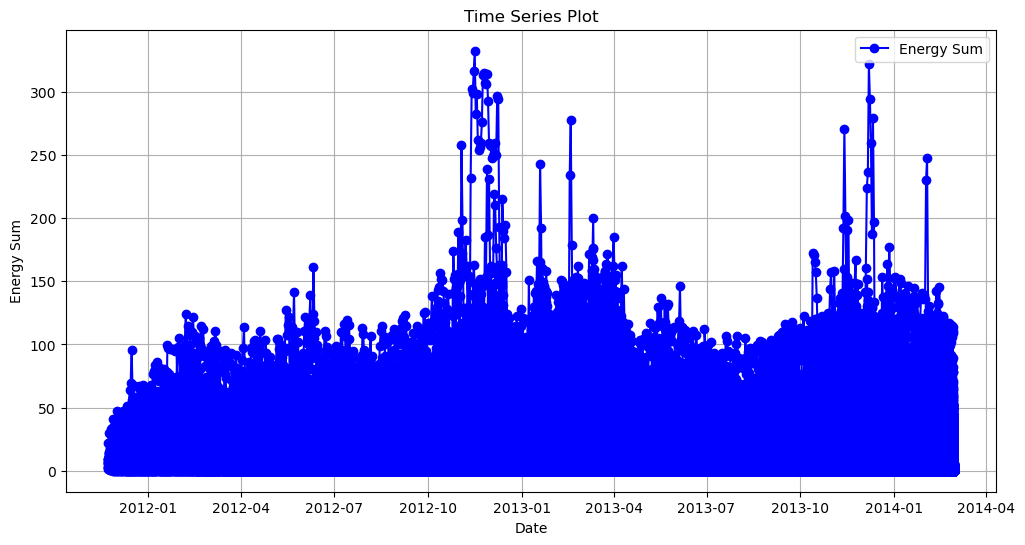

In [10]:
energy['day'] = pd.to_datetime(energy['day'])
plt.figure(figsize=(12, 6))
plt.plot(energy['day'], energy['energy_sum'], label='Energy Sum', marker='o', linestyle='-', color='b')
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Energy Sum')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
energy['year'] = energy['day'].dt.year
yearly_avg = energy.groupby('year')['energy_sum'].mean().reset_index()

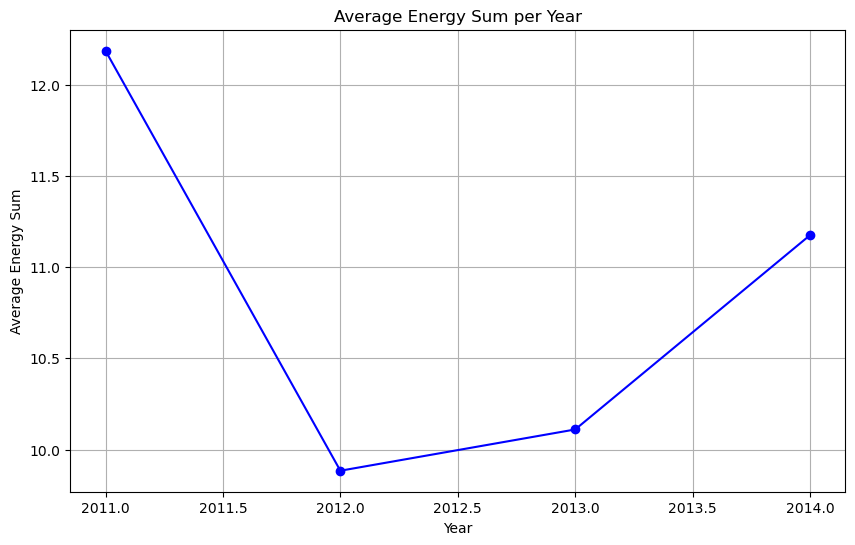

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg['year'], yearly_avg['energy_sum'], marker='o', linestyle='-', color='b')
plt.title('Average Energy Sum per Year')
plt.xlabel('Year')
plt.ylabel('Average Energy Sum')
plt.grid(True)
plt.show()